# Project: Investigate a Dataset (TMDB-Movies Dataset)
### Tanmay Jain
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

In this project, out of the provided datasets, I have selected the TMDB Movies. This dataset consists of 10866 movie titles from the year 1960 to 2015. It contains 21 features for every movie title including the cast, revenue, budget, etc.

### Questions analysed from the dataset:
<li>Movie with the longest and shortest runtime.</li>
<li>The most and least Profit earning movie.</li>
<li>Year with the highest movie profits.</li>
<li>Genres of most and least profit earning movies.</li>

<a id='wrangling'></a>
# Data Wrangling

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Loading the dataset
df=pd.read_csv('tmdb-movies.csv')

In [3]:
# Viewing the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
#Dropping the columns that are not useful in the investigation of the dataset.

df=df.drop(['id', 'imdb_id','homepage', 'cast','director', 'tagline','keywords','overview','production_companies'], axis=1)

In [24]:
# Check for any Null values in any column in the dataset.

df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
Profit             0
dtype: int64

In [25]:
#Since the number of rows with Null value is not significant, we can safely drop them.

df=df.dropna()

In [9]:
df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
# Exploratory Data Analysis (EDA)

# Question 1
## Movies with Longest and Shortest Runtime

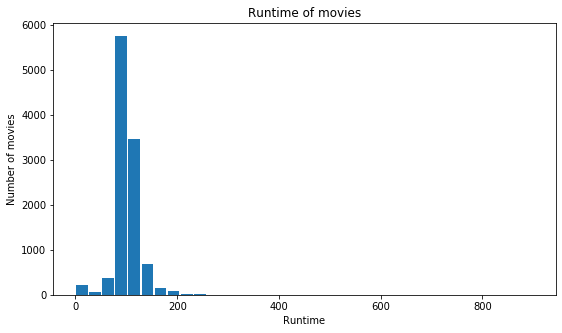

In [50]:
#Plotting a histogram to represent runtime of all movies.

plt.figure(figsize=(9,5))                 #Set the figure size
plt.title('Runtime of movies')            #Set the Title of graph
plt.xlabel('Runtime')                     #Set the X-axis label
plt.ylabel('Number of movies')            #Set the Y-axis label
plt.hist(df.runtime, rwidth=0.9,bins=35)  #Plotting the graph
plt.show()                                #Displaying the graph

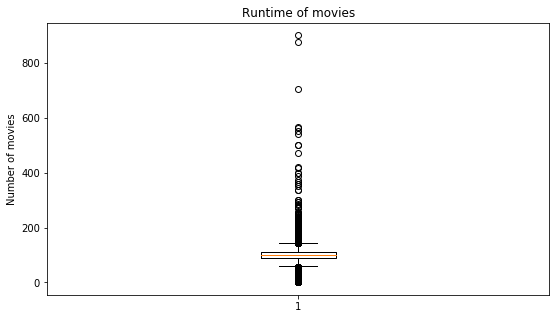

In [57]:
# Using a Box Plot approach to represent the same.

plt.figure(figsize=(9,5))                 #Set the figure size
plt.title('Runtime of movies')            #Set the Title of graph
plt.ylabel('Number of movies')            #Set the Y-axis label
plt.boxplot(df.runtime)                
plt.show()

In [59]:
def maxmin(x):
    mmax=x.idxmax()                      #Finding the index of movie with the longest runtime
    mmin=x[x!=0].idxmin()       #Finding the index of movie with the shortest runtime

    #Displaying the details of the movies with longest and shortest runtime
    return pd.concat([pd.DataFrame(df.loc[mmax]), pd.DataFrame(df.loc[mmin])], axis=1)

In [60]:
maxmin(df.runtime)    #Calling the funtion created above

,3894,4883
popularity,0.006925,0.078472
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
runtime,900,2
genres,Documentary,Animation
release_date,9/3/11,3/2/12
vote_count,14,29
vote_average,9.2,7.9
release_year,2011,2012


>From the above info, we conclude that the movie with the longest runtime is at index `3894` and has the title **The Story of Film: An Odyssey** with a runtime of 900 minutes.

>The movie with the shortest runtime is at index `4883` and has the title **Fresh Guacamole** with a runtime of 2 minutes.

# Question 2
## Most and Least Profit Earning movie

In [53]:
# Creating a new column Profit which states the actual profit made by a film 
# i.e. Revenue collected minus the Budget of the movie 
df['Profit']=df.revenue-df.budget

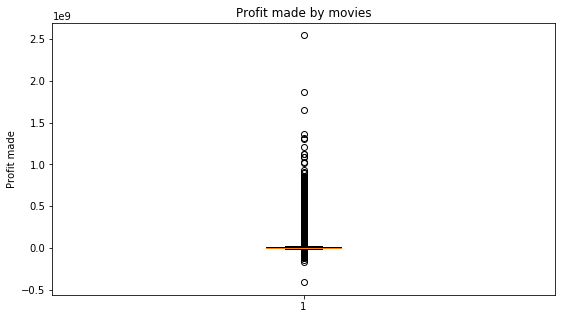

In [58]:
# Using a Box Plot approach to visualize the profit made by movies.

plt.figure(figsize=(9,5))                 #Set the figure size
plt.title('Profit made by movies')        #Set the Title of graph
plt.ylabel('Profit made')                 #Set the Y-axis label
plt.boxplot(df.Profit)                
plt.show()

>This can be seen from the boxplot that majority of the movies could not make any profit.

In [61]:
maxmin(df.Profit)          # Calling the function created in the above question

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,12/10/09,12/2/10
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010


>From the above info, we conclude that the movie with highest profit is at index `1386` and has a title **Avatar** with a profit of more than 2.5 billion.

>And the movie which had to suffer most loss(negative profit) is at index `2244` and has a title **The Warrior's Way** and had a loss of 413 millions.

# Question 3
## Year with highest movie profits.

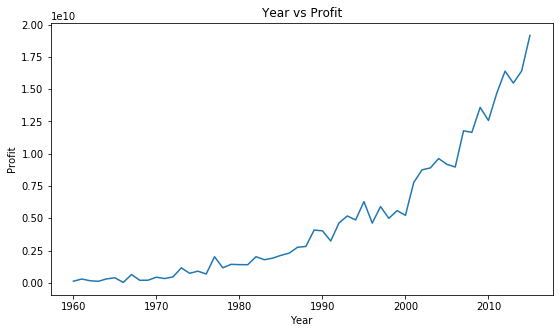

In [69]:
plt.figure(figsize=(9,5))       #Setting the figure size
plt.title('Year vs Profit')     #Set the title of graph
plt.xlabel('Year')              #Set the X-axis label
plt.ylabel('Profit')            #Set the Y-axis label

#To plot a smooth and understandable graph, we group the profit made by the release year of the movies
plt.plot(df.groupby('release_year')['Profit'].sum())
plt.show()

In [73]:
#Finding the year with the maximum profit in movies

df.groupby('release_year')['Profit'].sum().idxmax()

2015

>The above graph displays that the profit made by movies is increasing every year with a huge margin.
The year with most profit is clearly the year `2015`

# Question 4
## Genres of highest and lowest profit earning movies.

In [75]:
# Creating a funtion to plot the bar graphs of given genre after preprocessing the data
def genrePlot(x):
    genre=x.str.cat(sep='|')                     
    genre = pd.Series(genre.split('|'))
    genre.sort_values()
    genre.value_counts().plot.barh()

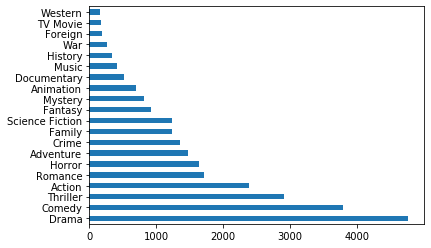

In [76]:
#Plot the genres of all movies.
genrePlot(df.genres)    

In [33]:
popular=df[df.Profit>1e08].genres        #Create a variable with genres of movies only with a high profit 
not_popular=df[df.Profit<1e08].genres    #Create a variable with genres of movies only with a low profit

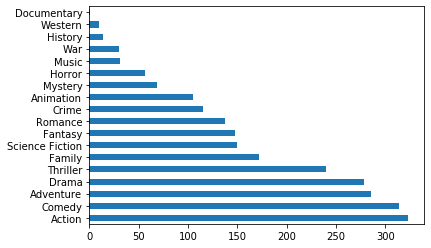

In [77]:
#Plot genres of high profit movies
genrePlot(popular)

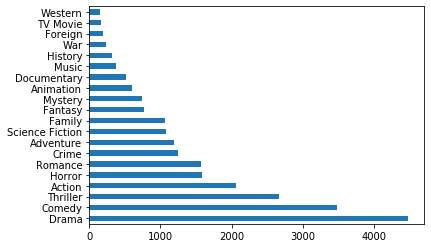

In [78]:
#Plot genres of low profit movies
genrePlot(not_popular)

>From the above two graphs, we can conclude that Action movies are the highest profit making movies, whereas Drama movies make usually less profit.

<a id='conclusions'></a>
# Conclusion

> From the above analysis, we can conclude that:
> <li>Movies usually have a runtime of around 100 mins.</li>
> <li>A movie is likely to make more profit than last year.</li>
> <li>Western genre has the least number of movies.</li>
> <li>For a movie to be more profitable, it should have a genre of Action, Comedy or Adventure.</li>


### Limitations:

<ul>
<li>This analysis is based upon the provided dataset which might contain some wrong or missing info. So the analysis cannot be said to be completely correct.</li>
<li>No units are mentioned for the budget or revenue fields. If they have varying units, then this analysis might not hold.</li>
<li>Dropping the rows with missing values also affected the overall analysis</li>
<li>While finding the famous genres, it is assumed that movies with a profit of more than 1 billion were popular.</li>
</ul>

# References
<li><a href=https://classroom.udacity.com/me>Udacity Classroom</a></li>
<li><a href=https://matplotlib.org/>Matplotlib Website</a></li>